In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df1 = pd.read_csv('df_merged.csv')
df1

,month,CO2ppm,Temp,Humid,VPD,Chl_a,Chl_b,TChl,Car,Chl_a_b,...,DF_abs,SFI_abs,Fv-Fm,Leaf_ExtractionYield,Root_ExtractionYield,Leaf_TPC,Root_TPC,Leaf_TFC,Root_TFC,scenario
0,5,381.681033,16.918639,83.130786,1.532512,8.79,2.22,11.00,2.97,3.97,...,0.328,0.215,0.830,19.00,18.90,7.476,6.270,5.217,0.861,SSP1
1,5,374.463441,16.922124,83.096722,1.532868,8.99,2.56,11.55,3.09,3.52,...,0.287,0.199,0.826,20.10,19.60,7.369,6.396,5.257,0.836,SSP1
2,5,371.850683,16.930256,82.488003,1.534584,9.66,2.44,12.10,3.11,3.96,...,0.384,0.229,0.828,20.70,20.40,7.369,6.396,5.242,0.841,SSP1
3,5,400.475202,16.921511,82.081632,1.534512,9.33,2.45,11.79,3.13,3.80,...,0.503,0.282,0.839,19.00,18.90,7.476,6.270,5.217,0.861,SSP1
4,5,381.360788,16.921323,83.888666,1.531475,10.53,2.58,13.11,3.37,4.08,...,0.304,0.203,0.832,20.10,19.60,7.369,6.396,5.257,0.836,SSP1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,9,1208.463000,25.901000,60.192000,2.560000,2.64,0.52,3.15,1.07,5.09,...,-0.626,0.051,0.722,7.10,14.60,7.743,5.277,1.455,0.513,SSP5
401,9,1211.911000,25.896000,60.254000,2.559000,4.74,1.12,5.86,1.53,4.22,...,-0.829,0.046,0.588,7.05,14.55,7.760,5.245,1.450,0.507,SSP5
402,9,1206.015000,25.923000,59.125000,2.565000,2.52,0.08,2.60,1.38,31.49,...,-0.879,0.037,0.643,7.00,14.50,7.814,5.324,1.460,0.518,SSP5
403,9,1225.166000,25.890000,55.446000,2.571000,2.63,0.39,3.02,1.17,6.73,...,-0.478,0.067,0.727,7.10,14.60,7.743,5.277,1.455,0.513,SSP5


In [4]:
df1.shape

(405, 26)

In [5]:
df1.columns

Index(['month', 'CO2ppm', 'Temp', 'Humid', 'VPD', 'Chl_a', 'Chl_b', 'TChl',
       'Car', 'Chl_a_b', 'TCh-Car', 'ABS-RC', 'Dio-RC', 'Tro-RC', 'Eto-RC',
       'PI_abs', 'DF_abs', 'SFI_abs', 'Fv-Fm', 'Leaf_ExtractionYield',
       'Root_ExtractionYield', 'Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC',
       'scenario'],
      dtype='object')

In [6]:
# 결측치 확인
print(df1.isnull().sum())

month                   0
CO2ppm                  0
Temp                    0
Humid                   0
VPD                     0
Chl_a                   0
Chl_b                   0
TChl                    0
Car                     0
Chl_a_b                 0
TCh-Car                 0
ABS-RC                  0
Dio-RC                  0
Tro-RC                  0
Eto-RC                  0
PI_abs                  0
DF_abs                  0
SFI_abs                 0
Fv-Fm                   0
Leaf_ExtractionYield    0
Root_ExtractionYield    0
Leaf_TPC                0
Root_TPC                0
Leaf_TFC                0
Root_TFC                0
scenario                0
dtype: int64


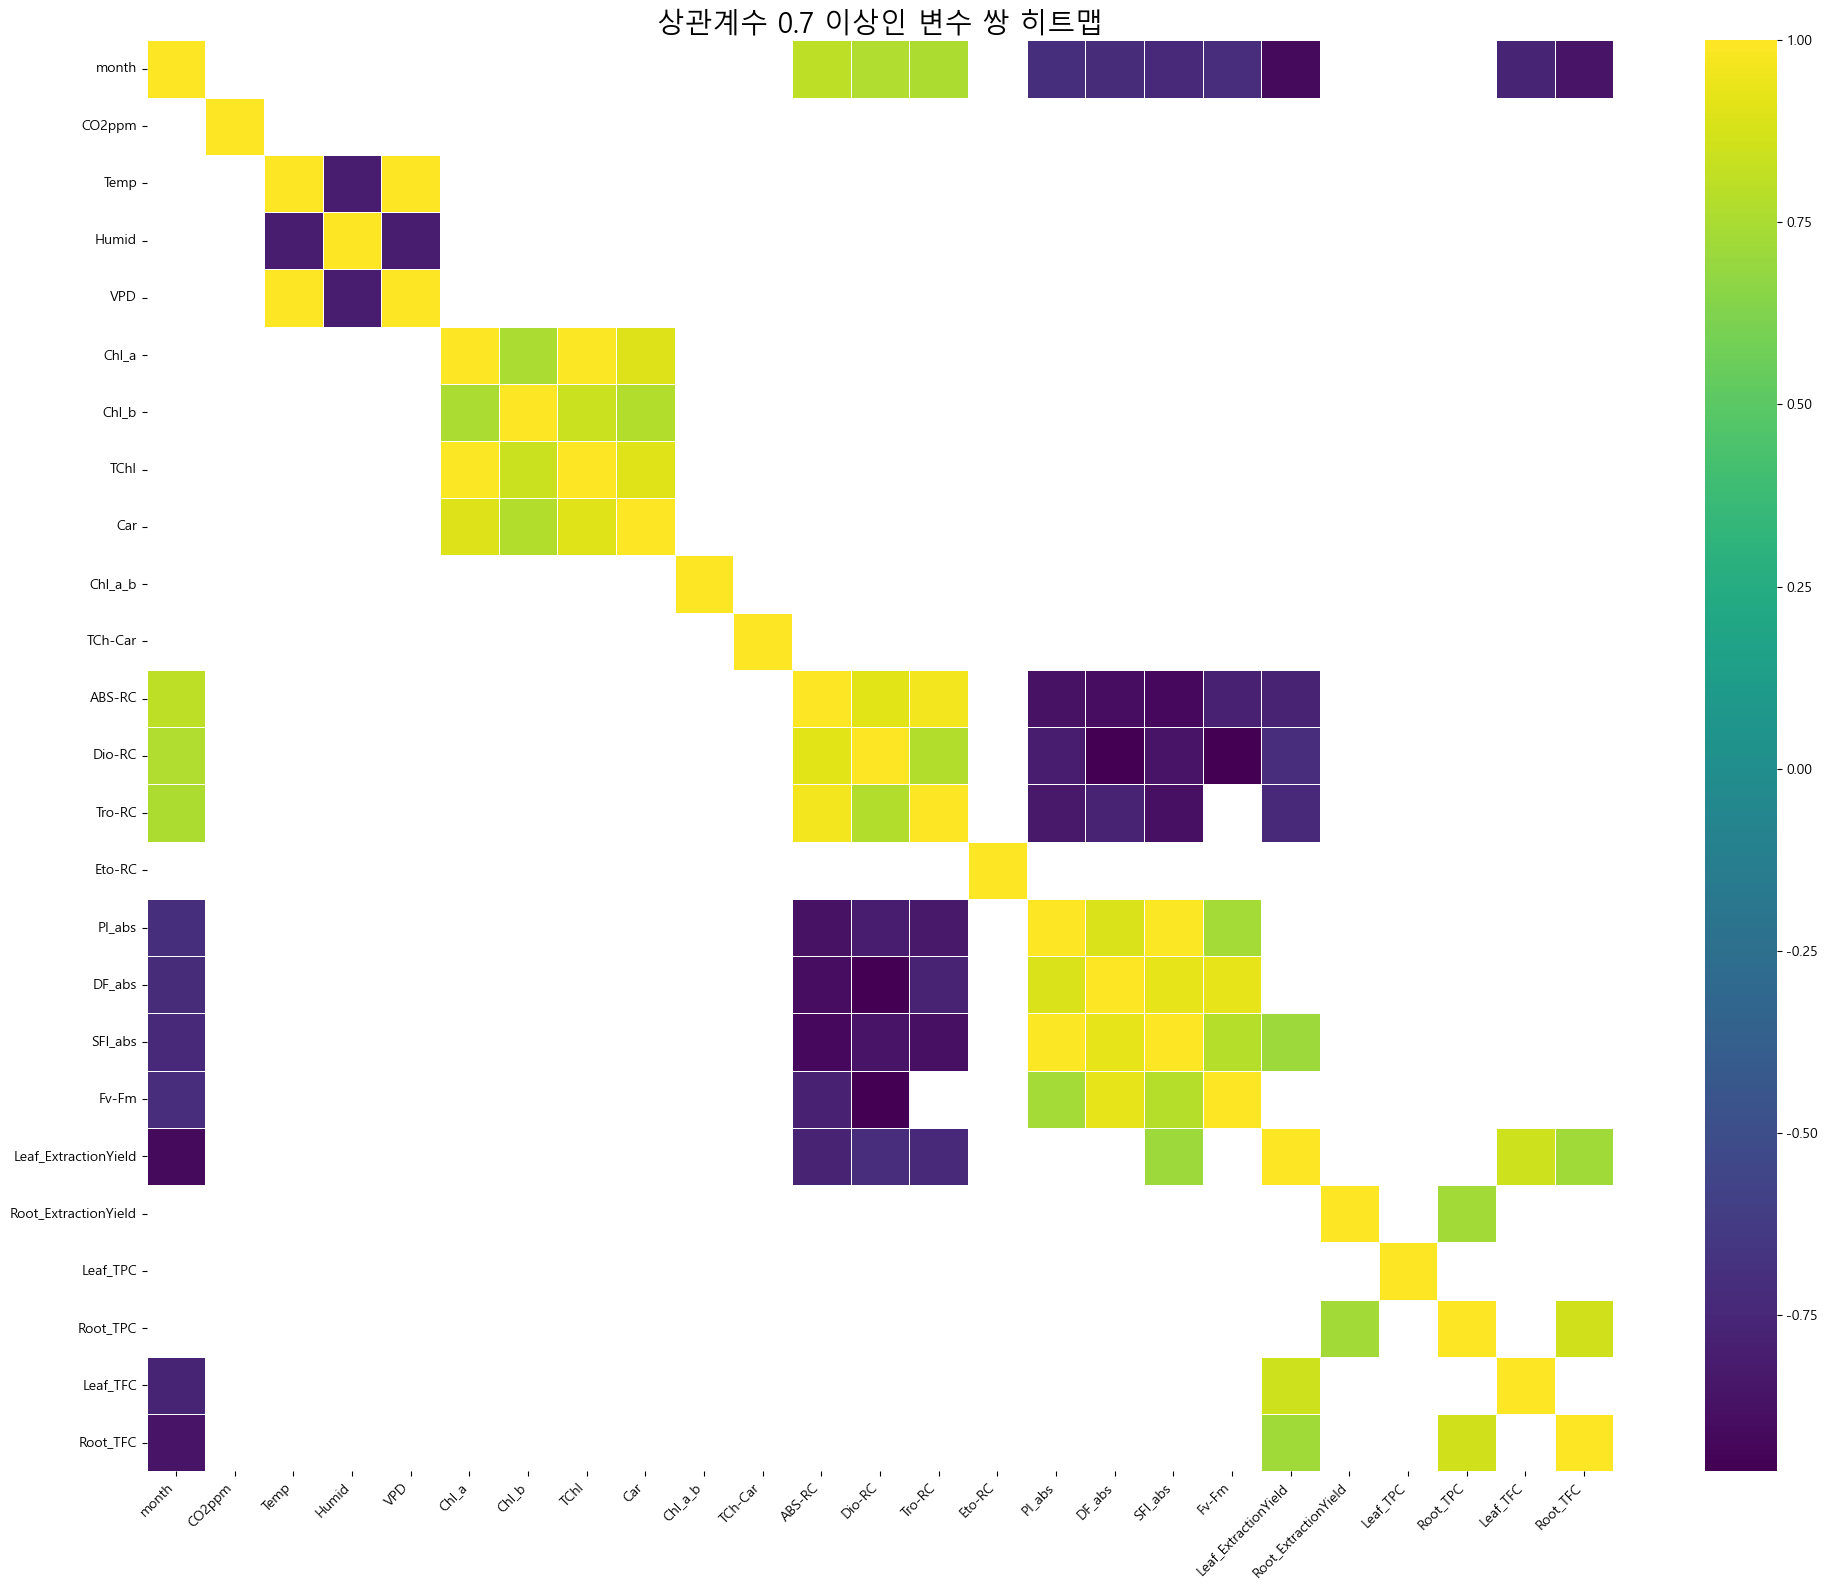

In [7]:
# 숫자형 데이터만 선택하여 새로운 데이터프레임 생성
numeric_df = df1.select_dtypes(include=np.number)

# 숫자형 데이터로 상관관계 행렬 계산
corr_matrix = numeric_df.corr()

# 히트맵 시각화
# 히트맵을 그릴 figure의 사이즈 설정
plt.figure(figsize=(20, 16))

# 상관계수의 절댓값이 0.7 미만인 값들은 그래프에 표시하지 않도록 '마스크(mask)' 생성
mask = np.abs(corr_matrix) < 0.7

# seaborn의 heatmap 함수를 사용하여 시각화
sns.heatmap(corr_matrix, 
            annot=False,      # 셀 안에 상관계수 값을 표시하지 않음
            cmap='viridis',   # 색상 팔레트 지정
            mask=mask,        # 위에서 생성한 마스크 적용
            linewidths=.5)    # 각 셀을 구분하는 라인 추가

# 그래프 제목 및 축 레이블 설정
plt.title('상관계수 0.7 이상인 변수 쌍 히트맵', fontsize=20)
plt.xticks(rotation=45, ha='right') # x축 라벨이 겹치지 않도록 회전
plt.yticks(rotation=0)
plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정

# 화면에 그래프 표시
plt.show()

In [36]:
# 상관관계 분석
numeric_df = df1.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

# 높은 상관관계를 가진 변수 쌍 찾기
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.7:
            high_corr_pairs.append((
                corr_matrix.columns[i], 
                corr_matrix.columns[j], 
                corr_matrix.iloc[i, j]
            ))

# 상관계수 크기 순으로 정렬
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

for var1, var2, corr in high_corr_pairs:
    print(f"{var1:20} <-> {var2:20} : {corr:6.3f}")

print(f"\n총 {len(high_corr_pairs)}개의 높은 상관관계 쌍 발견")

Temp                 <-> VPD                  :  0.997
PI_abs               <-> SFI_abs              :  0.989
Chl_a                <-> TChl                 :  0.987
ABS-RC               <-> Tro-RC               :  0.966
Dio-RC               <-> DF_abs               : -0.965
Dio-RC               <-> Fv-Fm                : -0.962
DF_abs               <-> Fv-Fm                :  0.931
DF_abs               <-> SFI_abs              :  0.925
ABS-RC               <-> SFI_abs              : -0.925
ABS-RC               <-> Dio-RC               :  0.914
month                <-> Leaf_ExtractionYield : -0.912
TChl                 <-> Car                  :  0.908
ABS-RC               <-> DF_abs               : -0.898
Chl_a                <-> Car                  :  0.895
PI_abs               <-> DF_abs               :  0.890
Tro-RC               <-> SFI_abs              : -0.882
ABS-RC               <-> PI_abs               : -0.874
Dio-RC               <-> SFI_abs              : -0.864
month     

In [9]:
# VIF (Variance Inflation Factor) 분석
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 숫자형 데이터만 선택 
vif_data = numeric_df.drop(['month'], axis=1, errors='ignore')

# VIF 계산
vif_results = []
for i in range(len(vif_data.columns)):
    vif = variance_inflation_factor(vif_data.values, i)
    vif_results.append({
        'Variable': vif_data.columns[i],
        'VIF': vif
    })

vif_df = pd.DataFrame(vif_results)
vif_df = vif_df.sort_values('VIF', ascending=False)

# VIF 값 출력
for _, row in vif_df.iterrows():
    status = ""
    if row['VIF'] > 10:
        status = " 심각한 다중공산성"
    elif row['VIF'] > 5:
        status = " 다중공산성 의심"
    print(f"{row['Variable']:25} : VIF = {row['VIF']:10.2f}{status}")

print("\n" + "="*60)
print(f"VIF > 10인 변수: {len(vif_df[vif_df['VIF'] > 10])}개")
print(f"VIF > 5인 변수: {len(vif_df[vif_df['VIF'] > 5])}개")


ABS-RC                    : VIF = 32235291.21 심각한 다중공산성
Tro-RC                    : VIF = 19394305.14 심각한 다중공산성
TChl                      : VIF = 3282460.19 심각한 다중공산성
Chl_a                     : VIF = 2015120.26 심각한 다중공산성
Dio-RC                    : VIF = 1769634.82 심각한 다중공산성
Chl_b                     : VIF =  154745.56 심각한 다중공산성
Temp                      : VIF =   51334.16 심각한 다중공산성
VPD                       : VIF =   29948.12 심각한 다중공산성
Fv-Fm                     : VIF =    9568.42 심각한 다중공산성
SFI_abs                   : VIF =    2201.79 심각한 다중공산성
Eto-RC                    : VIF =    1826.02 심각한 다중공산성
Root_TPC                  : VIF =    1727.92 심각한 다중공산성
Car                       : VIF =    1433.67 심각한 다중공산성
TCh-Car                   : VIF =    1426.98 심각한 다중공산성
DF_abs                    : VIF =     963.10 심각한 다중공산성
Leaf_TPC                  : VIF =     858.32 심각한 다중공산성
Humid                     : VIF =     814.51 심각한 다중공산성
Root_TFC                  : VIF =     563.64 심각한 다중공산성
PI_abs  

### 변수 제거
- TChl, Chl_a, Chl_b 중 TChl만 사용 (개별 성분 제거)

In [10]:
# TChl만 사용하고 Chl_a, Chl_b 제거
df_processed = df1.drop(['Chl_a', 'Chl_b'], axis=1)

In [11]:
df_processed.columns

Index(['month', 'CO2ppm', 'Temp', 'Humid', 'VPD', 'TChl', 'Car', 'Chl_a_b',
       'TCh-Car', 'ABS-RC', 'Dio-RC', 'Tro-RC', 'Eto-RC', 'PI_abs', 'DF_abs',
       'SFI_abs', 'Fv-Fm', 'Leaf_ExtractionYield', 'Root_ExtractionYield',
       'Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC', 'scenario'],
      dtype='object')

In [12]:
df_processed.shape

(405, 24)

In [13]:
# VIF (Variance Inflation Factor) 분석
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_df = df_processed.select_dtypes(include=np.number)
# 숫자형 데이터만 선택 
vif_data = numeric_df.drop(['month'], axis=1, errors='ignore')

# VIF 계산
vif_results = []
for i in range(len(vif_data.columns)):
    vif = variance_inflation_factor(vif_data.values, i)
    vif_results.append({
        'Variable': vif_data.columns[i],
        'VIF': vif
    })

vif_df = pd.DataFrame(vif_results)
vif_df = vif_df.sort_values('VIF', ascending=False)

# VIF 값 출력
for _, row in vif_df.iterrows():
    status = ""
    if row['VIF'] > 10:
        status = " 심각한 다중공산성"
    elif row['VIF'] > 5:
        status = " 다중공산성 의심"
    print(f"{row['Variable']:25} : VIF = {row['VIF']:10.2f}{status}")

print("\n" + "="*60)
print(f"VIF > 10인 변수: {len(vif_df[vif_df['VIF'] > 10])}개")
print(f"VIF > 5인 변수: {len(vif_df[vif_df['VIF'] > 5])}개")


ABS-RC                    : VIF = 31143979.23 심각한 다중공산성
Tro-RC                    : VIF = 18727552.39 심각한 다중공산성
Dio-RC                    : VIF = 1705523.14 심각한 다중공산성
Temp                      : VIF =   47295.63 심각한 다중공산성
VPD                       : VIF =   27469.00 심각한 다중공산성
Fv-Fm                     : VIF =    9243.16 심각한 다중공산성
SFI_abs                   : VIF =    2094.87 심각한 다중공산성
Eto-RC                    : VIF =    1727.37 심각한 다중공산성
Root_TPC                  : VIF =    1685.39 심각한 다중공산성
Car                       : VIF =    1376.18 심각한 다중공산성
TCh-Car                   : VIF =    1356.30 심각한 다중공산성
TChl                      : VIF =    1275.36 심각한 다중공산성
DF_abs                    : VIF =     905.55 심각한 다중공산성
Leaf_TPC                  : VIF =     843.37 심각한 다중공산성
Humid                     : VIF =     803.19 심각한 다중공산성
Root_TFC                  : VIF =     544.15 심각한 다중공산성
PI_abs                    : VIF =     541.87 심각한 다중공산성
Root_ExtractionYield      : VIF =     301.54 심각한 다중공산성
Leaf_Ext

### 변수 그룹별 PCA
- 프로젝트 목표 변수들(`Leaf_TPC`, `Root_TPC`, `Leaf_TFC`, `Root_TFC`)을 PCA 제외

In [14]:
df_pca = df1.copy()

In [15]:
# 🎯 올바른 그룹화 - 타겟 변수 완전 제외
feature_groups_for_pca = {
    '엽록소 관련': ['TChl', 'Car', 'TCh-Car'],
    '온도/습도 관련': ['Temp', 'VPD', 'Humid'],
    '광합성 효율 관련': ['ABS-RC', 'Tro-RC', 'Dio-RC', 'DF_abs', 'SFI_abs', 'PI_abs', 'Fv-Fm'],
    '추출수율 관련': ['Leaf_ExtractionYield', 'Root_ExtractionYield'] # 서로 다른 생물학적 의미(잎, 뿌리)
}

# 타겟 변수들 정의
target_variables = ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC']

In [16]:
# 타겟 변수들을 먼저 분리해서 보관
target_data = {}
for target in target_variables:
    if target in df_pca.columns:
        target_data[target] = df_pca[target].copy()
        # PCA 적용 전에 타겟 변수 제거
        df_pca = df_pca.drop(columns=[target])
        print("타겟 변수 분리")
    else:
        print("타겟 변수 x")

타겟 변수 분리
타겟 변수 분리
타겟 변수 분리
타겟 변수 분리


In [17]:
# 🔧 PCA 적용 - 특성 변수들에만
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 그룹별 PCA 적용 (특성 변수들에만)
pca_results = {}


for group_name, variables in feature_groups_for_pca.items():
    available_vars = [var for var in variables if var in df_pca.columns]
    
    if len(available_vars) > 2:  # 2개 이상의 변수가 있을 때만 PCA 적용
        print(f"\n{group_name} 그룹 PCA 적용:")
        print(f"원본 변수: {available_vars}")
        
        # 표준화
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df_pca[available_vars])
        
        # PCA 적용 (90% 이상의 분산을 설명하는 성분 수 결정)
        pca = PCA()
        pca.fit(scaled_data)
        
        # 90% 분산을 설명하는 성분 수 찾기
        cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
        n_components = np.argmax(cumsum_variance >= 0.90) + 1
        n_components = min(n_components, len(available_vars) - 1)  # 최소 1개는 제거
        
        # 최종 PCA 적용
        pca_final = PCA(n_components=n_components)
        pca_components = pca_final.fit_transform(scaled_data)
        
        # 결과 저장
        pca_results[group_name] = {
            'original_vars': available_vars,
            'n_components': n_components,
            'explained_variance': pca_final.explained_variance_ratio_,
            'cumulative_variance': np.sum(pca_final.explained_variance_ratio_),
            'components': pca_components,
            'scaler': scaler,
            'pca_model': pca_final
        }
        
        # 새로운 주성분 변수들을 데이터프레임에 추가
        for i in range(n_components):
            col_name = f"{group_name.replace(' ', '_').replace('/', '_')}_PC{i+1}"
            df_pca[col_name] = pca_components[:, i]
        
        # 원본 변수들 제거
        df_pca = df_pca.drop(columns=available_vars)
        
        print(f"   → {len(available_vars)}개 변수 → {n_components}개 주성분")
        print(f"   → 설명된 분산: {pca_final.explained_variance_ratio_}")
        print(f"   → 누적 설명 분산: {np.sum(pca_final.explained_variance_ratio_):.3f}")
    
    elif len(available_vars) == 2:
        print(f"{group_name} 그룹: 변수 2개만 있음 - PCA 적용하지 않음")
        print(f"변수들: {available_vars} (그대로 유지)")
    
    elif len(available_vars) == 1:
        print(f"{group_name} 그룹: 변수 1개만 있음 - 그대로 유지")
        print(f"변수: {available_vars[0]}")
    
    else:
        print(f"{group_name} 그룹: 사용 가능한 변수 없음")


엽록소 관련 그룹 PCA 적용:
원본 변수: ['TChl', 'Car', 'TCh-Car']
   → 3개 변수 → 2개 주성분
   → 설명된 분산: [0.72719151 0.27034624]
   → 누적 설명 분산: 0.998

온도/습도 관련 그룹 PCA 적용:
원본 변수: ['Temp', 'VPD', 'Humid']
   → 3개 변수 → 1개 주성분
   → 설명된 분산: [0.91548052]
   → 누적 설명 분산: 0.915

광합성 효율 관련 그룹 PCA 적용:
원본 변수: ['ABS-RC', 'Tro-RC', 'Dio-RC', 'DF_abs', 'SFI_abs', 'PI_abs', 'Fv-Fm']
   → 7개 변수 → 2개 주성분
   → 설명된 분산: [0.88211217 0.07991329]
   → 누적 설명 분산: 0.962
추출수율 관련 그룹: 변수 2개만 있음 - PCA 적용하지 않음
변수들: ['Leaf_ExtractionYield', 'Root_ExtractionYield'] (그대로 유지)


In [18]:
df_features_pca = df_pca.copy()

In [19]:
df_features_pca.shape

(405, 14)

In [20]:
df_features_pca.columns

Index(['month', 'CO2ppm', 'Chl_a', 'Chl_b', 'Chl_a_b', 'Eto-RC',
       'Leaf_ExtractionYield', 'Root_ExtractionYield', 'scenario',
       '엽록소_관련_PC1', '엽록소_관련_PC2', '온도_습도_관련_PC1', '광합성_효율_관련_PC1',
       '광합성_효율_관련_PC2'],
      dtype='object')

In [21]:
df_targets = pd.DataFrame(target_data)

In [22]:
df_targets.shape

(405, 4)

In [23]:
df_targets.columns

Index(['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC'], dtype='object')

In [24]:
df_complete_pca = pd.concat([df_features_pca, df_targets], axis=1)

In [25]:
df_complete_pca.shape

(405, 18)

In [26]:
df_complete_pca.columns

Index(['month', 'CO2ppm', 'Chl_a', 'Chl_b', 'Chl_a_b', 'Eto-RC',
       'Leaf_ExtractionYield', 'Root_ExtractionYield', 'scenario',
       '엽록소_관련_PC1', '엽록소_관련_PC2', '온도_습도_관련_PC1', '광합성_효율_관련_PC1',
       '광합성_효율_관련_PC2', 'Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC'],
      dtype='object')

In [27]:
df_complete_pca

,month,CO2ppm,Chl_a,Chl_b,Chl_a_b,Eto-RC,Leaf_ExtractionYield,Root_ExtractionYield,scenario,엽록소_관련_PC1,엽록소_관련_PC2,온도_습도_관련_PC1,광합성_효율_관련_PC1,광합성_효율_관련_PC2,Leaf_TPC,Root_TPC,Leaf_TFC,Root_TFC
0,5,381.681033,8.79,2.22,3.97,0.530,19.00,18.90,SSP1,2.380995,-0.749262,-5.004672,1.954689,-0.203646,7.476,6.270,5.217,0.861
1,5,374.463441,8.99,2.56,3.52,0.576,20.10,19.60,SSP1,2.708467,-0.819760,-4.999772,1.498949,-0.041259,7.369,6.396,5.257,0.836
2,5,371.850683,9.66,2.44,3.96,0.613,20.70,20.40,SSP1,3.020947,-0.608603,-4.933248,2.081206,-0.225140,7.369,6.396,5.242,0.841
3,5,400.475202,9.33,2.45,3.80,0.507,19.00,18.90,SSP1,2.848596,-0.817464,-4.894348,3.371893,-0.681504,7.476,6.270,5.217,0.861
4,5,381.360788,10.53,2.58,4.08,0.539,20.10,19.60,SSP1,3.611036,-0.882921,-5.082518,1.738339,-0.048841,7.369,6.396,5.257,0.836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,9,1208.463000,2.64,0.52,5.09,0.519,7.10,14.60,SSP5,-2.646097,0.156802,1.282351,-4.332729,-0.108993,7.743,5.277,1.455,0.513
401,9,1211.911000,4.74,1.12,4.22,0.478,7.05,14.55,SSP5,-0.602820,1.046742,1.273077,-5.889347,-2.980308,7.760,5.245,1.450,0.507
402,9,1206.015000,2.52,0.08,31.49,0.463,7.00,14.50,SSP5,-3.400551,-1.932519,1.404459,-5.996511,-1.614333,7.814,5.324,1.460,0.518
403,9,1225.166000,2.63,0.39,6.73,0.562,7.10,14.60,SSP5,-2.911708,-0.588549,1.779635,-3.514140,-0.267309,7.743,5.277,1.455,0.513


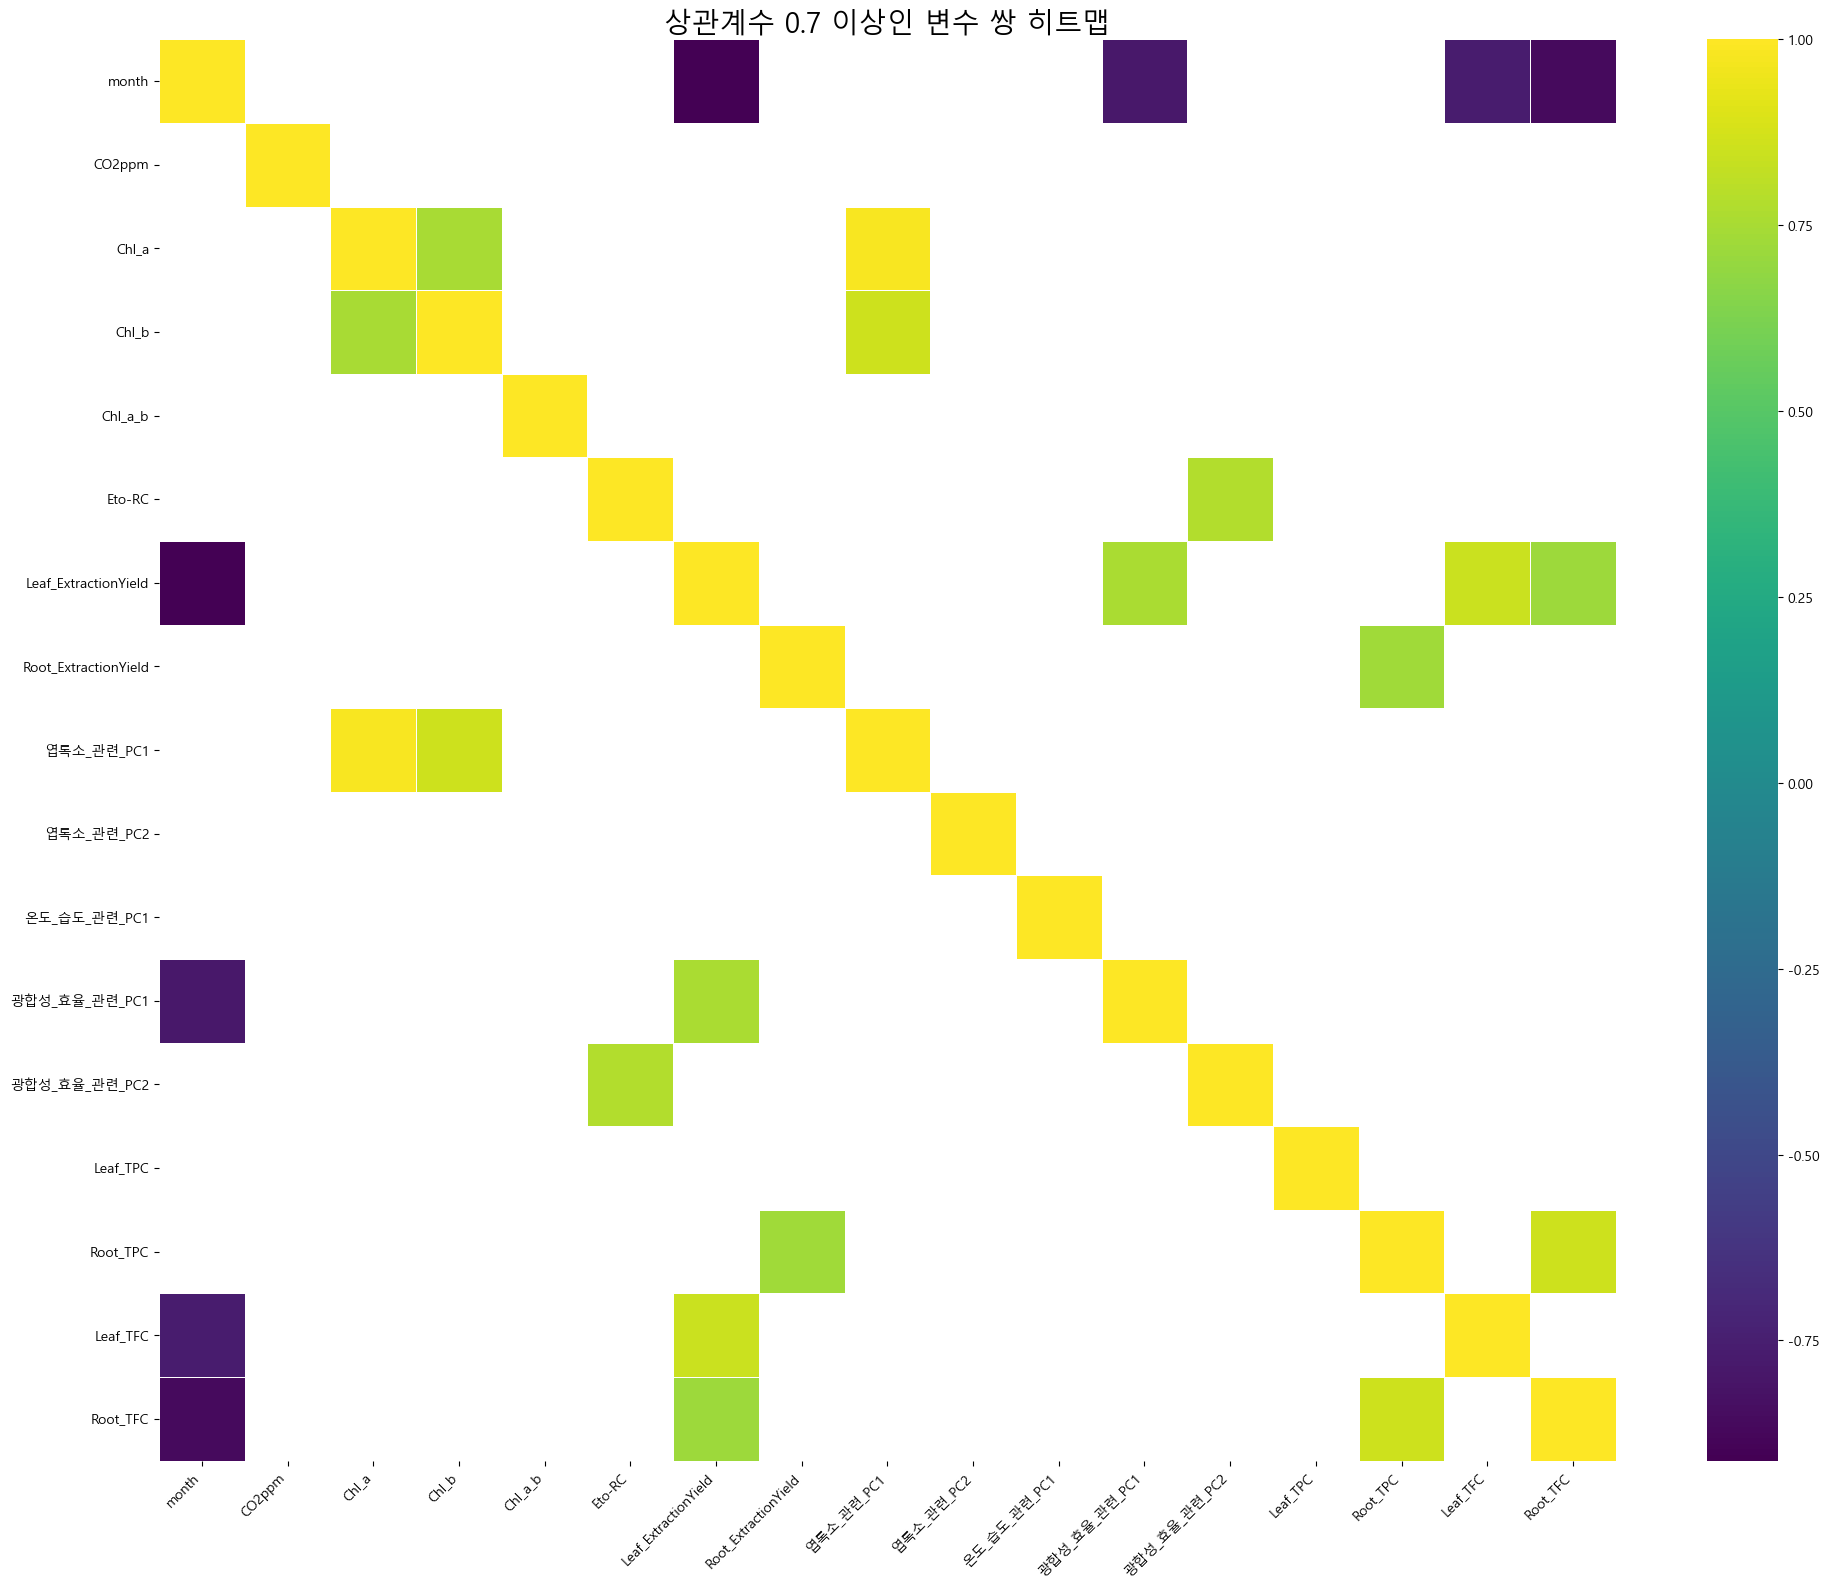

In [30]:
# 숫자형 데이터만 선택하여 새로운 데이터프레임 생성
numeric_df = df_complete_pca.select_dtypes(include=np.number)

# 숫자형 데이터로 상관관계 행렬 계산
corr_matrix = numeric_df.corr()

# 히트맵 시각화
# 히트맵을 그릴 figure의 사이즈 설정
plt.figure(figsize=(20, 16))

# 상관계수의 절댓값이 0.7 미만인 값들은 그래프에 표시하지 않도록 '마스크(mask)' 생성
mask = np.abs(corr_matrix) < 0.7

# seaborn의 heatmap 함수를 사용하여 시각화
sns.heatmap(corr_matrix, 
            annot=False,      # 셀 안에 상관계수 값을 표시하지 않음
            cmap='viridis',   # 색상 팔레트 지정
            mask=mask,        # 위에서 생성한 마스크 적용
            linewidths=.5)    # 각 셀을 구분하는 라인 추가

# 그래프 제목 및 축 레이블 설정
plt.title('상관계수 0.7 이상인 변수 쌍 히트맵', fontsize=20)
plt.xticks(rotation=45, ha='right') # x축 라벨이 겹치지 않도록 회전
plt.yticks(rotation=0)
plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정

# 화면에 그래프 표시
plt.show()

In [29]:
df_complete_pca.to_csv('df_pca.csv', index=False, encoding='utf-8-sig')